# 2주차 스터디

Made by 35기 코딩부장 류제현

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 구글 드라이브 마운트 

In [3]:
# 파일을 읽어오기 위해선 구글 드라이브에 마운트 해야 합니다

## 2. 정규방정식

    데이터 생성 

**$Y=3X+4 + error$**

Note) random을 사용했기 때문에 실행 결과는 항상 달라진다.

실행결과를 동일하게 맞추고 싶다면, np.random.seed(숫자)를 지정

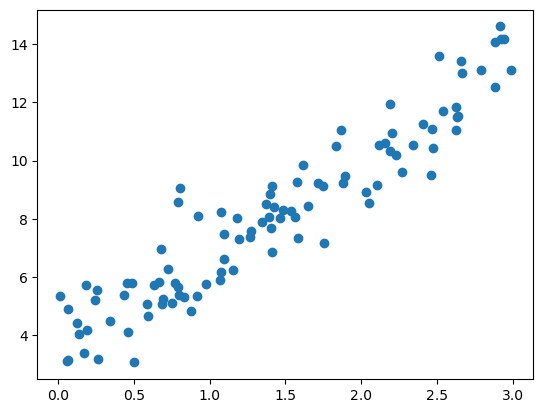

In [4]:
X = 3 *  np.random.rand(100,1)
y = (4 + 3*X) + np.random.randn(100,1) # 랜덤한 잡음을 추가

plt.scatter(X,y);

    정규 방정식(Normal Equation)

OLS 추정치를 계산하기 위해선 정규 방정식을 풀면 된다

MSE(Mean Square Error)를 최소화 하는 값이 정규방정식의 해가 된다

$\theta = (X^TX)^{-1}X^Ty$

In [5]:
# 절편모델링을 위해 행렬 앞에 1을 붙여줘야함
X_b = np.c_[np.ones((100,1)), X]

# 정규방정식을 계산한다
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best #3X+4와 비슷한 방정식을 찾았다

array([[3.54611734],
       [3.22101906]])

In [7]:
# 계산한 Theta를 새로운 데이터에 맞춰보자
X_new = np.array([[0],[3]])
X_new_m = np.c_[np.ones((2,1)), X_new]

# 0과 3에 대한 예측값
y_new = X_new_m.dot(theta_best)

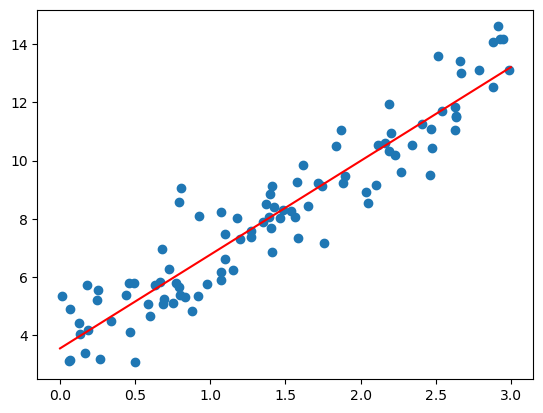

In [8]:
# 기존의 점도표
plt.scatter(X,y)

# 넘파이로 구한 회귀식 (빨간선)
plt.plot(X_new, y_new, color='r');

## 3. 큰 수의 법칙

**큰 모집단에서 무작위로 뽑은 표본의 평균이 전체 모집단의 평균과 가까울 가능성이 높다**

---

    동전 던지기 예시    

0은 앞면, 1은 뒷면

In [9]:
# 그룹 a는 동전을 10번, b는 100번 던진다
group_a = [np.random.randint(0,2,10).mean() for _ in range(100)]
group_b = [np.random.randint(0,2,100).mean() for _ in range(100)]

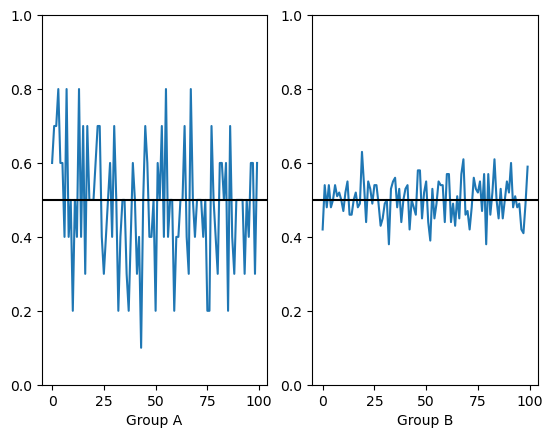

In [10]:
# 그룹 a 시각화
plt.subplot(1,2,1)
plt.plot(group_a)
plt.xlabel('Group A')
plt.axhline(y= 0.5,c='k')
plt.ylim((0, 1))
# 그룹 b 시각화
plt.subplot(1,2,2)
plt.plot(group_b)
plt.xlabel('Group B')
plt.axhline(y=0.5,c='k')
plt.ylim((0,1));

# 4. 싸이킷런 소개

* 싸이킷런은 가장 많이 쓰이고, 쉬운 머신러닝 라이브러리이다

* 싸이킷런만 잘 다뤄도 머신러닝 프로젝트, 공모전 등등 우수한 성적 낼 수 있다

* Numpy, Pandas와 호환성이 우수하다

* model을 만들고, fit(학습)해주면 된다

    싸이킷런의 LinearRegression

절편을 직접 추가하지 않아도 된다

In [11]:
from sklearn.linear_model import LinearRegression

# 모델을 만들고, 학습한다
linear_model = LinearRegression()
linear_model.fit(X, y)

# 절편과 기울기 출력
linear_model.coef_, linear_model.intercept_

(array([[3.22101906]]), array([3.54611734]))

In [12]:
sample = np.array([[1.5]])

linear_model.predict(sample)

array([[8.37764592]])

In [13]:
# Score의 경우 R^2값을 리턴한다
linear_model.score(X,y)

0.8871246162794338